In [4]:
import numpy as np
import pandas as pd

train=pd.read_csv(r'C:\Users\2112161\OneDrive - Cognizant\Desktop\DATA\New folder\scripsts python\kaggle\train.csv')

In [1]:


from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from collections import Counter
import random
%matplotlib inline
import os
os.chdir(r"C:\\Users\2112161\\OneDrive - Cognizant\Desktop\\DATA\\New folder\\scripsts python")
from scipy.stats import skew
from sklearn import datasets
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,SVR
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostRegressor,AdaBoostClassifier,GradientBoostingClassifier,GradientBoostingRegressor
from xgboost import XGBClassifier,XGBRegressor,XGBRFClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_absolute_error,mean_squared_error,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from pandas_profiling import ProfileReport

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [8]:
train.to_sql("spacetitanic", con =engine)

In [10]:
sql='''

Select * from spacetitanic
limit 5


''';


df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [11]:
sql='''



Select
passengerid,
Name,
SUBSTRING(PassengerId, 1, 4) as group_id,
case when SUBSTRING(PassengerId, 1, 4)=lead(SUBSTRING(PassengerId, 1, 4)) over (order by PassengerId asc) then 'yes' else 'no' end as groups
from spacetitanic
order by PassengerId asc

''';

    
df_sql = pd.read_sql_query(sql,con=engine)
df_sql.head(10)

,PassengerId,Name,group_id,groups
0,0001_01,Maham Ofracculy,0001,no
1,0002_01,Juanna Vines,0002,no
2,0003_01,Altark Susent,0003,yes
3,0003_02,Solam Susent,0003,no
4,0004_01,Willy Santantines,0004,no
5,0005_01,Sandie Hinetthews,0005,no
6,0006_01,Billex Jacostaffey,0006,yes
7,0006_02,Candra Jacostaffey,0006,no
8,0007_01,Andona Beston,0007,no
9,0008_01,Erraiam Flatic,0008,yes


In [13]:
df=pd.read_csv('employees.csv')
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [14]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
First Name,Douglas,Thomas,Maria,Jerry,Larry,Dennis,Ruby,NaN,Angela,Frances,...,Robin,Rose,Anthony,Tina,George,Henry,Phillip,Russell,Larry,Albert
Gender,Male,Male,Female,Male,Male,Male,Female,Female,Female,Female,...,Female,Female,Male,Female,Male,NaN,Male,Male,Male,Male
Start Date,8/6/1993,3/31/1996,4/23/1993,3/4/2005,1/24/1998,4/18/1987,8/17/1987,7/20/2015,11/22/2005,8/8/2002,...,7/24/1987,8/25/2002,10/16/2011,5/15/1997,6/21/2013,11/23/2014,1/31/1984,5/20/2013,4/20/2013,5/15/2012
Last Login Time,12:42 PM,6:53 AM,11:17 AM,1:00 PM,4:47 PM,1:35 AM,4:20 PM,10:43 AM,6:29 AM,6:51 AM,...,1:35 PM,5:12 AM,8:35 AM,3:53 PM,5:47 PM,6:09 AM,6:30 AM,12:39 PM,4:45 PM,6:24 PM
Salary,97308,61933,130590,138705,101004,115163,65476,45906,95570,139852,...,100765,134505,112769,56450,98874,132483,42392,96914,60500,129949
Bonus %,6.945,4.17,11.858,9.34,1.389,10.125,10.012,11.598,18.523,7.524,...,10.982,11.051,11.625,19.04,4.479,16.655,19.675,1.421,11.985,10.169
Senior Management,True,True,False,True,True,False,True,NaN,True,True,...,True,True,True,True,True,False,False,False,False,True
Team,Marketing,NaN,Finance,Finance,Client Services,Legal,Product,Finance,Engineering,Business Development,...,Client Services,Marketing,Finance,Engineering,Marketing,Distribution,Finance,Product,Business Development,Sales


In [16]:
df.groupby(['Team']).

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [4]:
#trying gradient boosting
data=[['yes',12,'blue','yes'],
      ['yes',87,'green','yes'],
      ['no',44,'blue','no'],
      ['yes',19,'red','no'],
      ['no',32,'green','yes'],
      ['no',14,'blue','yes']
     ]
columns=['likes_popcorn','age','fav_color','likestroll2']
df=pd.DataFrame(data,columns=columns)
df

,likes_popcorn,age,fav_color,likestroll2
0,yes,12,blue,yes
1,yes,87,green,yes
2,no,44,blue,no
3,yes,19,red,no
4,no,32,green,yes
5,no,14,blue,yes


In [12]:
x=df.iloc[:,:-1]
y=df.drop(columns=x.columns)
y

,likestroll2
0,yes
1,yes
2,no
3,no
4,yes
5,yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   likes_popcorn  6 non-null      object
 1   age            6 non-null      int64 
 2   fav_color      6 non-null      object
 3   likestroll2    6 non-null      object
dtypes: int64(1), object(3)
memory usage: 320.0+ bytes


In [73]:
catcols=[i for i in df.columns if df[i].dtypes=='object'and i!='likestroll2']
catcols

['likes_popcorn', 'fav_color']

In [48]:
numcols=[i for i in df.columns if df[i].dtypes!='object']
numcols

['age']

In [26]:
import math
math.log(4/6)

-0.40546510810816444

In [143]:
p1=Pipeline([('scale',StandardScaler())
           ])
p2=Pipeline([('imp2',SimpleImputer(strategy='most_frequent')),
            ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'))
           ])

In [144]:
ct=ColumnTransformer(transformers=[
('numcols',p1,numcols),
    ('catcols',p2,catcols)
],
remainder='passthrough'
)

In [145]:
fp=Pipeline([
    ('ct',ct),
    ('classifier',DecisionTreeClassifier())
])

In [146]:
fp

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numcols',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age']),
                                                 ('catcols',
                                                  Pipeline(steps=[('imp2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['likes_popcorn',
                                                   'fav_color'])])),
                ('classifier', DecisionTreeClassifier())])

In [147]:
xtrain=pd.DataFrame(ct.fit_transform(x),columns=['age','likes_popcorn','favcolbluegreen','favcolorred'])
xtrain

,age,likes_popcorn,favcolbluegreen,favcolorred
0,-0.875762,1.0,0.0,0.0
1,2.021981,1.0,1.0,0.0
2,0.360608,0.0,0.0,0.0
3,-0.605306,1.0,0.0,1.0
4,-0.103031,0.0,1.0,0.0
5,-0.798489,0.0,0.0,0.0


In [77]:
x

,likes_popcorn,age,fav_color
0,yes,12,blue
1,yes,87,green
2,no,44,blue
3,yes,19,red
4,no,32,green
5,no,14,blue


In [149]:
StandardScaler().fit_transform(x[['age']])

array([[-0.87576235],
       [ 2.02198072],
       [ 0.36060803],
       [-0.60530633],
       [-0.10303086],
       [-0.7984892 ]])

In [141]:
dt1=DecisionTreeClassifier(max_depth=2)
dt1.fit(xtrain,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'X[3] <= 0.5\n0.444\n6\n[2, 4]'),
 Text(0.4, 0.5, 'X[0] <= 0.129\n0.32\n5\n[1, 4]'),
 Text(0.2, 0.16666666666666666, '0.0\n3\n[0, 3]'),
 Text(0.6, 0.16666666666666666, '0.5\n2\n[1, 1]'),
 Text(0.8, 0.5, '0.0\n1\n[1, 0]')]

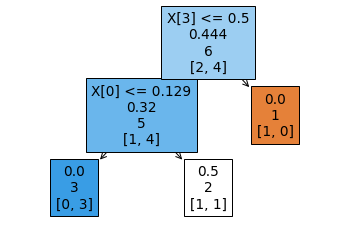

In [142]:
plot_tree(dt1,label='True',filled='True')#1st outputs are no seconds one are yes 2,4 means 2 no and 4 yes

In [125]:
pd.concat([xtrain,y],axis=1)

,age,likes_popcorn,favcolbluegreen,favcolorred,likestroll2
0,-0.875762,1.0,0.0,0.0,yes
1,2.021981,1.0,1.0,0.0,yes
2,0.360608,0.0,0.0,0.0,no
3,-0.605306,1.0,0.0,1.0,no
4,-0.103031,0.0,1.0,0.0,yes
5,-0.798489,0.0,0.0,0.0,yes


In [114]:
df.encodedout=[1,1,0,0,1,1]

In [120]:
df

,likes_popcorn,age,fav_color,likestroll2,p1,encodedout
0,yes,12,blue,yes,0.7,1
1,yes,87,green,yes,0.7,1
2,no,44,blue,no,0.7,0
3,yes,19,red,no,0.7,0
4,no,32,green,yes,0.7,1
5,no,14,blue,yes,0.7,1


In [127]:
df['r1']=df.encodedout-df.p1
df

,likes_popcorn,age,fav_color,likestroll2,p1,encodedout,r1
0,yes,12,blue,yes,0.7,1,0.3
1,yes,87,green,yes,0.7,1,0.3
2,no,44,blue,no,0.7,0,-0.7
3,yes,19,red,no,0.7,0,-0.7
4,no,32,green,yes,0.7,1,0.3
5,no,14,blue,yes,0.7,1,0.3


In [140]:
'a'+'r'

'ar'

In [133]:
'100'.join('Geeks')

'G100e100e100k100s'

In [150]:
df

,likes_popcorn,age,fav_color,likestroll2,p1,encodedout,r1
0,yes,12,blue,yes,0.7,1,0.3
1,yes,87,green,yes,0.7,1,0.3
2,no,44,blue,no,0.7,0,-0.7
3,yes,19,red,no,0.7,0,-0.7
4,no,32,green,yes,0.7,1,0.3
5,no,14,blue,yes,0.7,1,0.3


In [153]:
dt1.predict([[-0.875762,1.0,0.0,0.0]])

C:\Users\2112161\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)

In [2]:
pip install mysql-connector

In [4]:
pip install mysql-connector-python


In [11]:
import mysql.connector as sql

In [33]:
import sqlite3

In [52]:
con=sqlite3.connect('emp.db')

In [53]:
c=con.cursor()

In [54]:
c.execute('create table emp (name varchar(10),eid int)')

In [55]:
c.execute("insert into emp values('ambar',20)")

In [64]:
c.execute("select * from emp")

In [62]:
c.fetchall()

[('ambar', 20), ('ambar', 20)]

In [63]:
c.execute("insert into emp values('kumar',30)")

In [65]:
c.fetchall()

[('ambar', 20), ('ambar', 20), ('kumar', 30)]